## Решение практических задач с Keras и TensorFlow

In [1]:
import tensorflow_datasets as tdfs
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [78]:
df = tdfs.as_dataframe(tdfs.load('diamonds',split='train'))
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [83]:
for c in df.columns:
    if c.startswith('features/'):
        df[c] = (df[c]-df[c].min())/(df[c].max()-df[c].min())

In [89]:
# df['price'] = 1 + (df['price']-df['price'].min())/(df['price'].max()-df['price'].min())

In [90]:
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,0.220374,0.285714,0.666667,0.50,0.488889,0.326923,0.648976,0.118846,0.133019,1.336271
1,0.124740,0.428571,0.666667,1.00,0.530555,0.211538,0.554935,0.101698,0.116667,1.146186
2,0.074844,0.571429,0.333333,1.00,0.519444,0.211538,0.491620,0.090323,0.102830,1.085906
3,0.272349,0.428571,1.000000,0.25,0.583333,0.288462,0.674115,0.123430,0.145912,1.357355
4,0.027027,0.857143,0.833333,1.00,0.533333,0.211538,0.412477,0.075552,0.086792,1.017300


<AxesSubplot:>

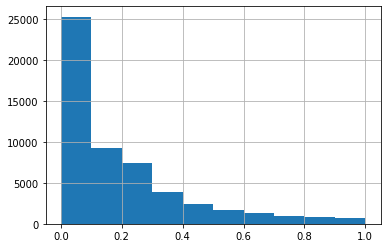

In [56]:
df['price'].hist()

In [91]:
X = df[[x for x in df.columns if x.startswith('features/')]]
Y = df['price']
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [92]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(9,),activation='sigmoid'),
    keras.layers.Dense(1,activation=None)
])

In [93]:
model.compile(loss='MSE',optimizer='adam',metrics=['MAE','MAPE'])
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10)

Epoch 1/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0212 - MAE: 0.0903 - MAPE: 7.0820 - val_loss: 0.0052 - val_MAE: 0.0526 - val_MAPE: 4.1999
Epoch 2/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0052 - MAE: 0.0523 - MAPE: 4.2153 - val_loss: 0.0049 - val_MAE: 0.0508 - val_MAPE: 4.1027
Epoch 3/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0051 - MAE: 0.0512 - MAPE: 4.1374 - val_loss: 0.0047 - val_MAE: 0.0490 - val_MAPE: 3.9433
Epoch 4/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0049 - MAE: 0.0503 - MAPE: 4.0588 - val_loss: 0.0057 - val_MAE: 0.0514 - val_MAPE: 4.1265
Epoch 5/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0048 - MAE: 0.0488 - MAPE: 3.9233 - val_loss: 0.0045 - val_MAE: 0.0472 - val_MAPE: 3.7776
Epoch 6/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0047 - MAE: 0.0481 - MAPE: 3.8626 - val_loss: 0.0048 - val_MAE: 0.0517 - val_MAPE:

<AxesSubplot:>

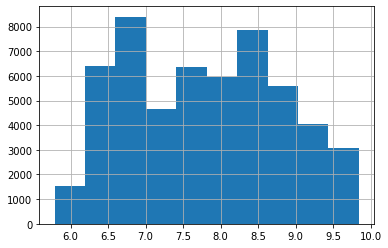

In [73]:
df = tdfs.as_dataframe(tdfs.load('diamonds',split='train'))

df['logprice'] = np.log(df['price'])
df['logprice'].hist()

In [74]:
for c in df.columns:
    if c.startswith('features/'):
        df[c] = (df[c]-df[c].min())/(df[c].max()-df[c].min())

In [75]:
X = df[[x for x in df.columns if x.startswith('features/')]]
Y = df['logprice']
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [76]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(9,),activation='tanh'),
    keras.layers.Dense(1,activation=None)
])

In [77]:
model.compile(loss='MSE',optimizer='sgd',metrics=['MAE','MAPE'])
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10)

Epoch 1/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.2944 - MAE: 0.3137 - MAPE: 4.1066 - val_loss: 0.0570 - val_MAE: 0.1827 - val_MAPE: 2.33650.8306 - MAE: 0.5 - E
Epoch 2/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0533 - MAE: 0.1739 - MAPE: 2.2332 - val_loss: 0.0530 - val_MAE: 0.1683 - val_MAPE: 2.1816
Epoch 3/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0500 - MAE: 0.1673 - MAPE: 2.1472 - val_loss: 0.0496 - val_MAE: 0.1648 - val_MAPE: 2.1244
Epoch 4/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0473 - MAE: 0.1622 - MAPE: 2.0827 - val_loss: 0.0498 - val_MAE: 0.1691 - val_MAPE: 2.1496
Epoch 5/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0448 - MAE: 0.1571 - MAPE: 2.0191 - val_loss: 0.0457 - val_MAE: 0.1540 - val_MAPE: 2.0015
Epoch 6/10
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0426 - MAE: 0.1526 - MAPE: 1.9620 - val_loss: 0.0453 - val_MA

## MNIST

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [98]:
train_x.shape, train_x.max()

((60000, 28, 28), 255)

In [3]:
train_x = train_x.astype(np.float32)/256.0
test_x = test_x.astype(np.float32)/256.0

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [110]:
train_y_oh = keras.utils.to_categorical(train_y,10)
test_y_oh = keras.utils.to_categorical(test_y,10)
train_y.shape, train_y_oh.shape

((60000,), (60000, 10))

In [113]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
hist = model.fit(train_x,train_y_oh,validation_data=(test_x,test_y_oh),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2741 - acc: 0.9220 - val_loss: 0.1496 - val_acc: 0.9545
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1239 - acc: 0.9635 - val_loss: 0.1080 - val_acc: 0.9686
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0849 - acc: 0.9746 - val_loss: 0.1049 - val_acc: 0.9669
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653 - acc: 0.9797 - val_loss: 0.0873 - val_acc: 0.9726
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - acc: 0.9844 - val_loss: 0.0756 - val_acc: 0.97630.
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - acc: 0.9871 - val_loss: 0.0827 - val_acc: 0.9743 0.
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - acc: 0.9893 - val_loss: 0.0805 - val_acc: 0.9768
Epoch 8/10
1875/1875 [==============================] - 5

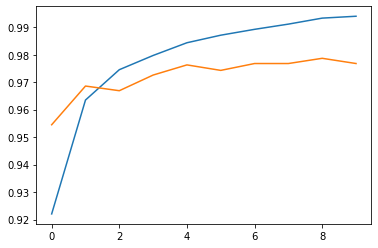

In [115]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [5]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2758 - acc: 0.9209 - val_loss: 0.1539 - val_acc: 0.9557
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1255 - acc: 0.9625 - val_loss: 0.1060 - val_acc: 0.9677
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0875 - acc: 0.9734 - val_loss: 0.0973 - val_acc: 0.9701
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - acc: 0.9795 - val_loss: 0.0787 - val_acc: 0.9773
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - acc: 0.9836 - val_loss: 0.0804 - val_acc: 0.9742
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0430 - acc: 0.9867 - val_loss: 0.0810 - val_acc: 0.9762
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0352 - acc: 0.9892 - val_loss: 0.0786 - val_acc: 0.9777
Epoch 8/10
1875/1875 [==============================] - 6

In [8]:
pred_p = model.predict(test_x)
pred_c = tf.argmax(pred_p,axis=1)
pred_p[0],pred_c[0]

(array([6.97525522e-08, 1.45022785e-08, 6.36827565e-07, 8.77206912e-05,
        2.63948086e-12, 7.80755016e-08, 5.54000364e-16, 9.99837518e-01,
        7.80763969e-08, 7.38739982e-05], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>)

In [122]:
def run(activation, n_neurons):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(n_neurons,activation=activation),
        keras.layers.Dense(10,activation='softmax')])
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
    hist = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10,verbose=False,callbacks=[estop])
    return np.max(hist.history['acc']), np.max(hist.history['val_acc'])

run('tanh',10)

(0.9399166703224182, 0.9326000213623047)

In [121]:
for act in ['relu','tanh','sigmoid']:
    for n in [5,10,100]:
        acc, vacc = run(act,n)
        print(f"{act},{n} -> train={acc}, val={vacc}")

relu,5 -> train=0.8934833407402039, val=0.8902999758720398
relu,10 -> train=0.9408166408538818, val=0.9362999796867371
relu,100 -> train=0.9935666918754578, val=0.9775999784469604
tanh,5 -> train=0.8752666711807251, val=0.8736000061035156
tanh,10 -> train=0.9403499960899353, val=0.9329000115394592
tanh,100 -> train=0.995033323764801, val=0.9767000079154968
sigmoid,5 -> train=0.8840333223342896, val=0.8819000124931335
sigmoid,10 -> train=0.9314333200454712, val=0.9243999719619751
sigmoid,100 -> train=0.9892500042915344, val=0.9768999814987183
